In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 12)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
China_df = country_df[country_df.Country == 'US'].set_index('Date')
world_without_China = pd.DataFrame({col:W[col] - China_df[col] for col in ['Confirmed', 'Recovered', 'Deaths']})
world_without_China['Country'] = ['World without US' for _ in range(len(world_without_China))]
world_without_China['Date'] = world_without_China.index
country_df = country_df.append(world_without_China)

In [7]:
country_df['Date'] = pd.to_datetime(country_df.Date)
country_df['Removed'] = country_df.Recovered + country_df.Deaths
#country_df['Removed'] = country_df.Confirmed.shift(periods = 14)
country_df['Active'] = country_df.Confirmed - country_df.Removed
country_df['Mortality'] = country_df.Deaths/country_df.Removed
country_df['Part_Active'] = country_df.Active/country_df.Confirmed

In [8]:
last_day = dt.date.today() - dt.timedelta(days=1)
Last_day_df = country_df[country_df.Date == last_day].set_index('Country')
Last_day_df = Last_day_df[Last_day_df.Confirmed>5000]

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  


In [9]:
C = ['Confirmed', 'Active', 'Removed', 'Recovered', 'Deaths', 'Mortality', 'Part_Active']

In [10]:
Important_countries = ['India', 'World', 'World without US',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'United Kingdom', 'France',
                      'Korea, South', 'Iran'][::-1]
DF_Dict = {country: country_df[country_df.Country == country].set_index('Date').drop(columns = ['Country'])
                        for country in Last_day_df.index}

In [11]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
China,83918,2020-04-27,4637,78374,83011,907,0.055860,0.010808
France,165963,2020-04-27,23327,46293,69620,96343,0.335062,0.580509
Germany,158758,2020-04-27,6126,114500,120626,38132,0.050785,0.240189
India,29451,2020-04-27,939,7137,8076,21375,0.116270,0.725782
Iran,91472,2020-04-27,5806,70933,76739,14733,0.075659,0.161066
Italy,199414,2020-04-27,26977,66624,93601,105813,0.288213,0.530620
"Korea, South",10752,2020-04-27,244,8854,9098,1654,0.026819,0.153832
Spain,229422,2020-04-27,23521,120832,144353,85069,0.162941,0.370797
US,988197,2020-04-27,56259,111424,167683,820514,0.335508,0.830314


In [12]:
Last_day_df[Last_day_df.Deaths>1000]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Belgium,46687,2020-04-27,7207,10878,18085,28602,0.398507,0.612633
Brazil,67446,2020-04-27,4603,31142,35745,31701,0.128773,0.470020
Canada,49616,2020-04-27,2841,18268,21109,28507,0.134587,0.574553
China,83918,2020-04-27,4637,78374,83011,907,0.055860,0.010808
France,165963,2020-04-27,23327,46293,69620,96343,0.335062,0.580509
Germany,158758,2020-04-27,6126,114500,120626,38132,0.050785,0.240189
Iran,91472,2020-04-27,5806,70933,76739,14733,0.075659,0.161066
Ireland,19648,2020-04-27,1102,9233,10335,9313,0.106628,0.473992
Italy,199414,2020-04-27,26977,66624,93601,105813,0.288213,0.530620


In [13]:
Doubling_period = {}
for cun in DF_Dict:
    tr = int(Last_day_df[Last_day_df.index == cun].Confirmed)
    rp = len(DF_Dict[cun][DF_Dict[cun].Confirmed >= tr/2])
    Doubling_period[cun] = [rp]
pd.DataFrame(Doubling_period)[Important_countries].transpose()

,0
Iran,27
"Korea, South",55
France,20
United Kingdom,17
China,78
Spain,25
Italy,29
Germany,26
US,18
World without US,20


In [14]:
Daily_new =  ['Confirmed', 'Removed', 'Recovered', 'Deaths']
d = 14
for cun in Last_day_df.index:
    df = DF_Dict[cun]
    
    #DF_Dict[cun]['Removed'] = DF_Dict[cun].Confirmed.shift(periods = 14)
    DF_Dict[cun]['Active'] = DF_Dict[cun].Confirmed - DF_Dict[cun].Removed
    DF_Dict[cun]['Mortality'] = DF_Dict[cun].Deaths/DF_Dict[cun].Removed
    DF_Dict[cun]['Part_Active'] = DF_Dict[cun].Active/DF_Dict[cun].Confirmed

    for col in Daily_new:
        L = list(df[col])
        K = L[:d] + [L[i+d] - L[i] for i in range(len(df) - d)]
        DF_Dict[cun]['Week_'+col] = K
    DF_Dict[cun]['Week_Mortality'] = DF_Dict[cun]['Week_Deaths']/DF_Dict[cun]['Week_Removed']

In [15]:
DC = DF_Dict['India'].columns
DF_Dict['India']#.tail(10)

,Confirmed,Deaths,Recovered,Removed,Active,Mortality,Part_Active,Week_Confirmed,Week_Removed,Week_Recovered,Week_Deaths,Week_Mortality
Date,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-23,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-24,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-25,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-26,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-27,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-28,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-29,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-30,1,0,0,0,1,NaN,1.000000,1,0,0,0,NaN


In [16]:
Last_day_df[Last_day_df.index.isin(Important_countries)]

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
China,83918,2020-04-27,4637,78374,83011,907,0.055860,0.010808
France,165963,2020-04-27,23327,46293,69620,96343,0.335062,0.580509
Germany,158758,2020-04-27,6126,114500,120626,38132,0.050785,0.240189
India,29451,2020-04-27,939,7137,8076,21375,0.116270,0.725782
Iran,91472,2020-04-27,5806,70933,76739,14733,0.075659,0.161066
Italy,199414,2020-04-27,26977,66624,93601,105813,0.288213,0.530620
"Korea, South",10752,2020-04-27,244,8854,9098,1654,0.026819,0.153832
Spain,229422,2020-04-27,23521,120832,144353,85069,0.162941,0.370797
US,988197,2020-04-27,56259,111424,167683,820514,0.335508,0.830314


In [17]:
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 'Spain': 'yellow',
         'Italy': 'pink', 'Iran': 'red', 'Ireland': 'violet', 'United Kingdom': 'Purple', 'Korea, South': 'Black',
         'France': 'orange', 'Germany': 'Green'}

def plotwithx(x, cols, DF_Dict = DF_Dict):
    for col in cols:
        if col!=x:
            plt.figure(figsize = (14, 8))
            plt.title(f'{col} with respect to {x}')
            plt.xlabel(x)
            plt.ylabel(col)
            if x in DC:
                plt.xscale('log')
                #plt.xlim(5*10**3, 5*10**6)

            if col not in ['Mortality', 'Part_Active', 'Week_Mortality']:
                plt.yscale('log')
                #plt.ylim(10**1, 10**7)
            for cun in Important_countries:
                df = DF_Dict[cun]#.tail(50)
                if x == 'Date':
                    X = df.index
                else:
                    X = df[x]
                plt.plot(X, 
                         df[col],
                         label = cun,
                         #linewidth = 3.5,
                         linestyle = '-.' if 'World' in cun else '-',
                         color = colors[cun], 
                         alpha = 0.6
                        )
            plt.legend(Important_countries)
            plt.plot()


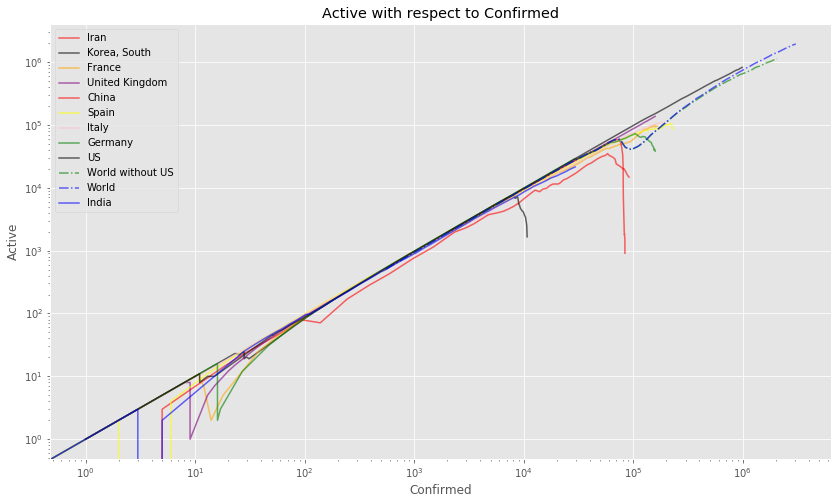

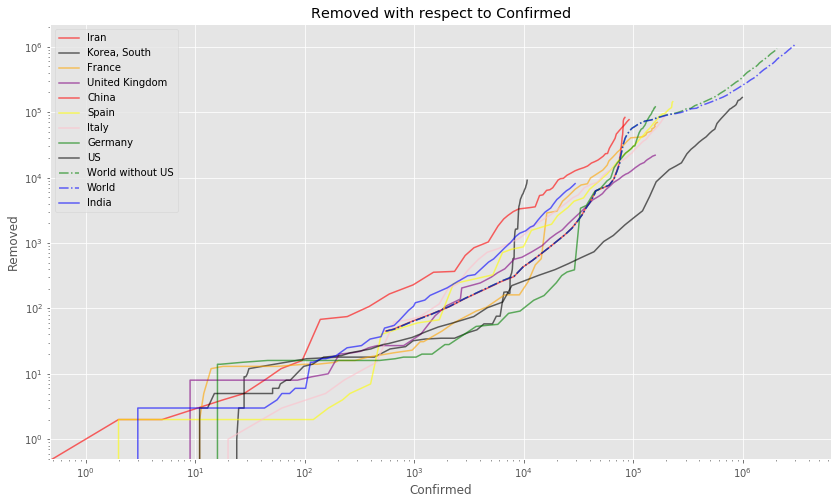

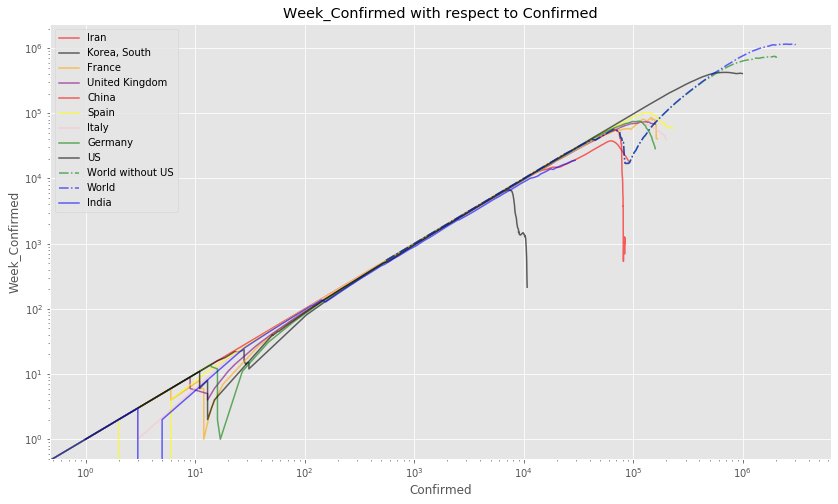

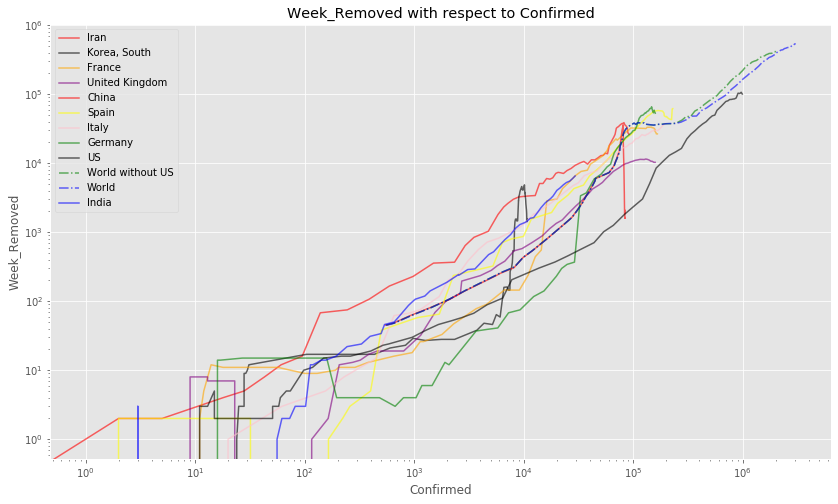

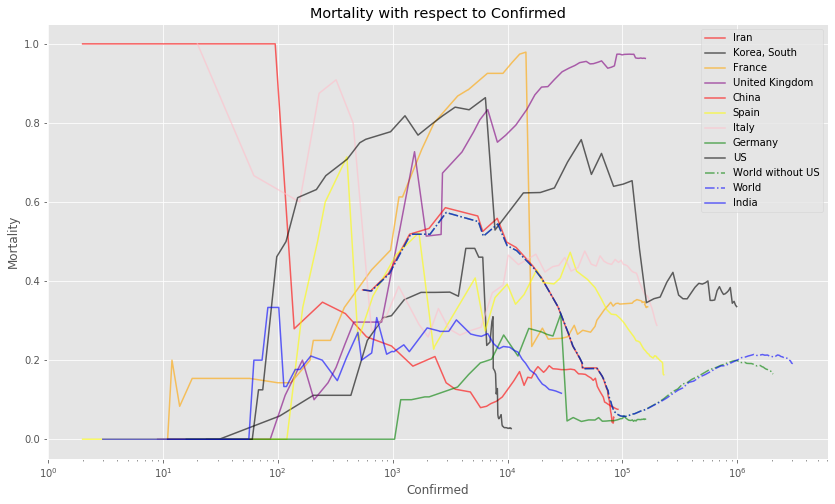

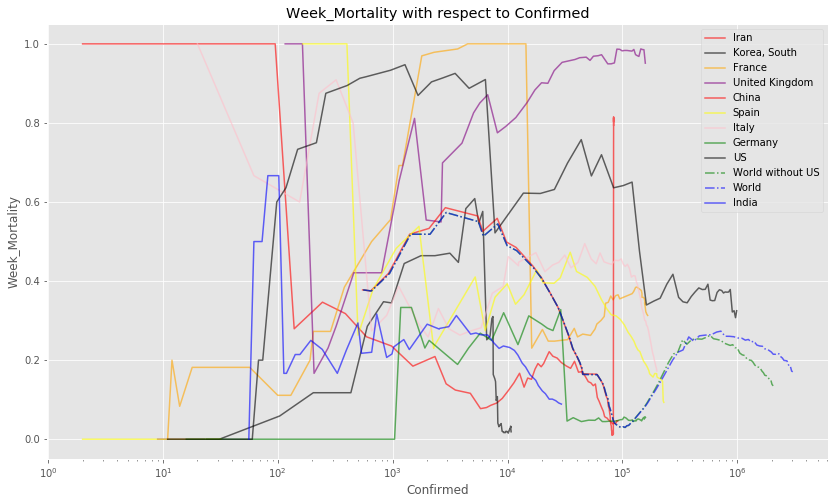

In [18]:
plotwithx('Confirmed', ['Active', 'Removed', 'Week_Confirmed', 'Week_Removed', 'Mortality', 'Week_Mortality'])

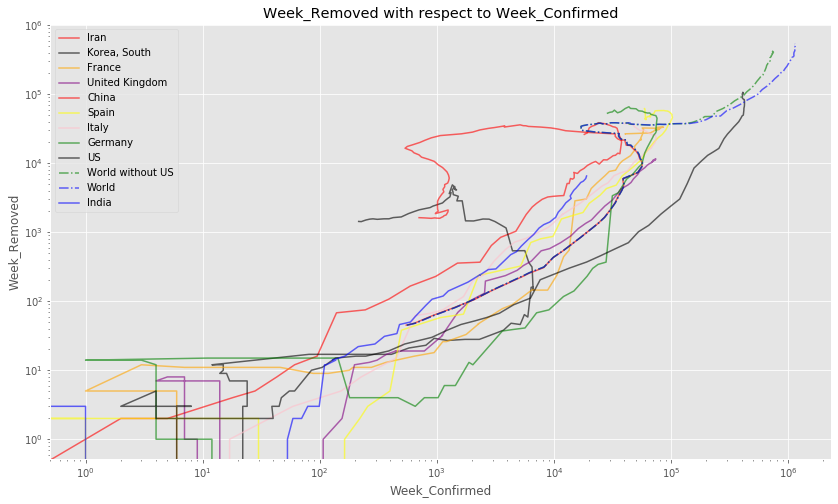

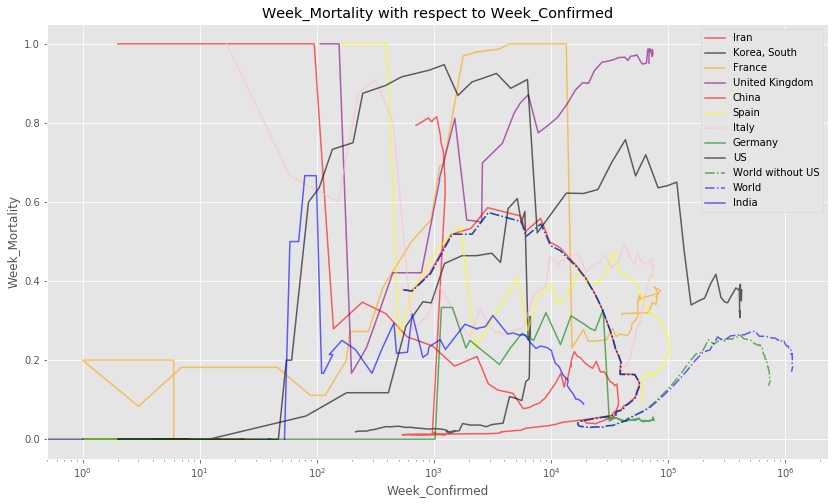

In [19]:
plotwithx('Week_Confirmed', ['Week_Removed', 'Week_Mortality'])

In [20]:
Last_day_df.sort_values('Part_Active', ascending = False)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Norway,7599,2020-04-27,205,32,237,7362,0.864979,0.968812
Bangladesh,5913,2020-04-27,152,131,283,5630,0.537102,0.952139
Singapore,14423,2020-04-27,14,1095,1109,13314,0.012624,0.923109
Russia,87147,2020-04-27,794,7346,8140,79007,0.097543,0.906595
Portugal,24027,2020-04-27,928,1357,2285,21742,0.406127,0.904899
Ecuador,23240,2020-04-27,663,1557,2220,21020,0.298649,0.904475
Qatar,11244,2020-04-27,10,1066,1076,10168,0.009294,0.904305
Panama,6021,2020-04-27,167,455,622,5399,0.268489,0.896695
Ukraine,9009,2020-04-27,220,864,1084,7925,0.202952,0.879676


In [21]:
Last_day_df.sort_values('Mortality', ascending = True)

,Confirmed,Date,Deaths,Recovered,Removed,Active,Mortality,Part_Active
Country,,,,,,,,
Qatar,11244,2020-04-27,10,1066,1076,10168,0.009294,0.904305
Singapore,14423,2020-04-27,14,1095,1109,13314,0.012624,0.923109
Australia,6721,2020-04-27,83,5588,5671,1050,0.014636,0.156227
Malaysia,5820,2020-04-27,99,3957,4056,1764,0.024408,0.303093
Chile,13813,2020-04-27,198,7327,7525,6288,0.026312,0.455223
"Korea, South",10752,2020-04-27,244,8854,9098,1654,0.026819,0.153832
Israel,15555,2020-04-27,204,7200,7404,8151,0.027553,0.524012
United Arab Emirates,10839,2020-04-27,82,2090,2172,8667,0.037753,0.799613
Belarus,11289,2020-04-27,75,1740,1815,9474,0.041322,0.839224


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


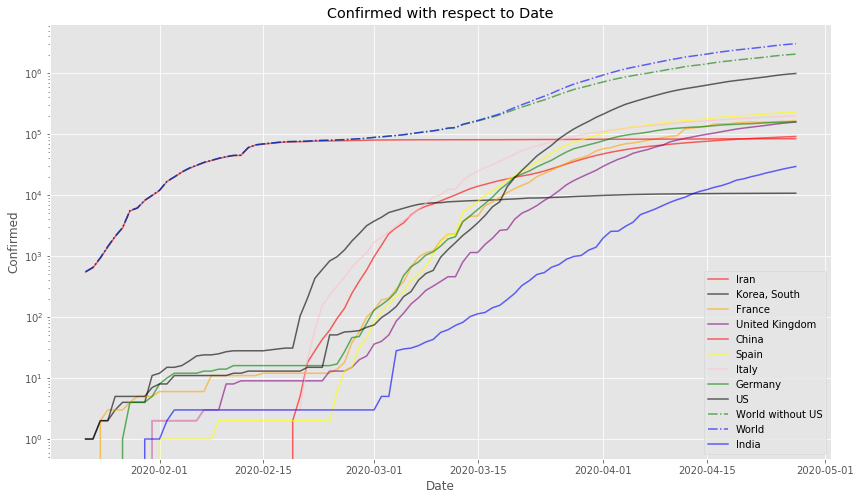

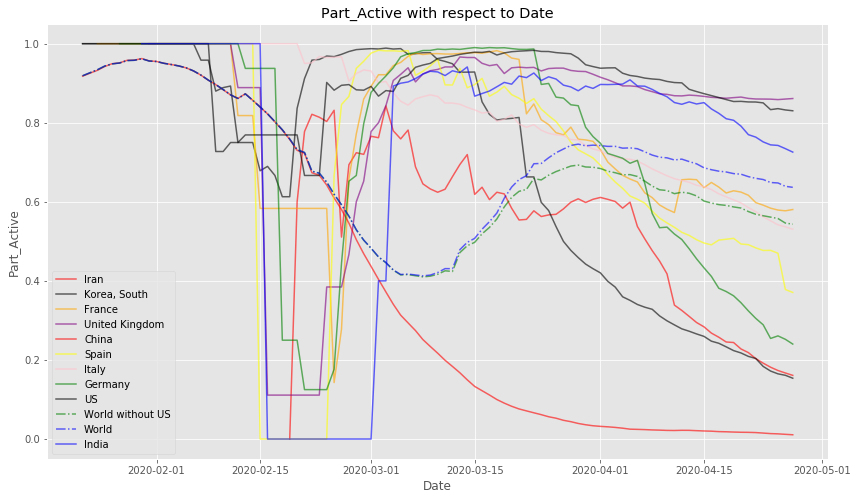

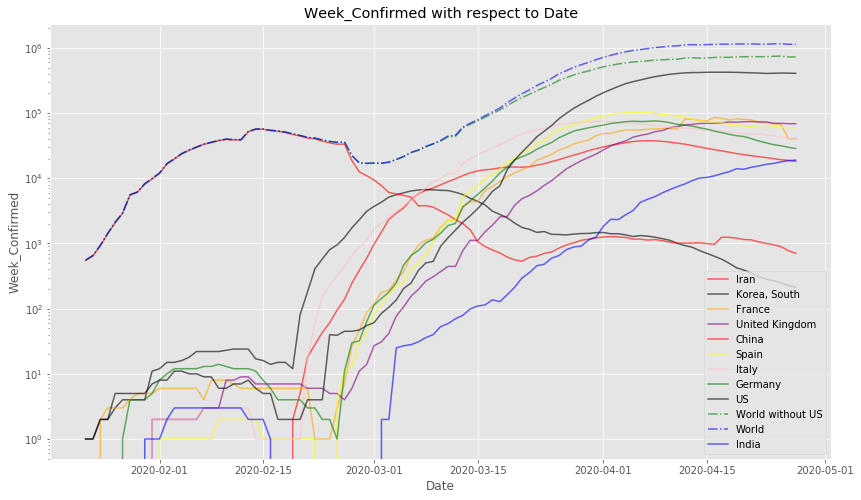

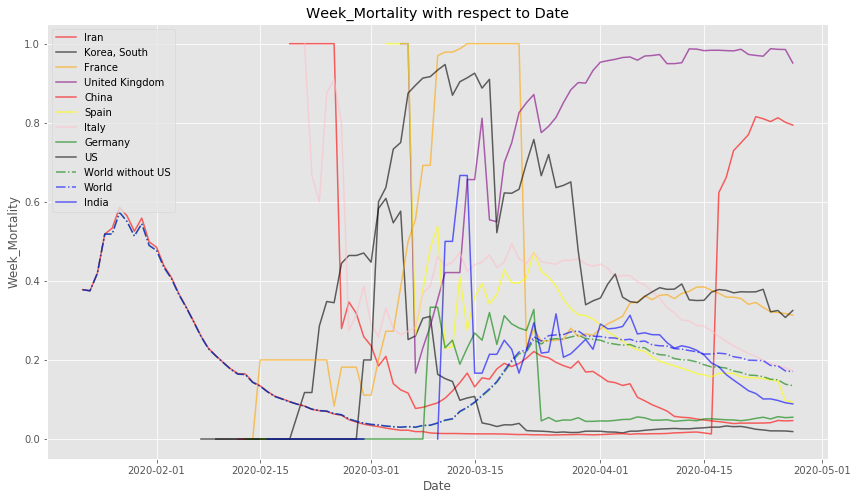

In [22]:
plotwithx('Date', ['Confirmed', 'Part_Active', 'Week_Confirmed', 'Week_Mortality'])

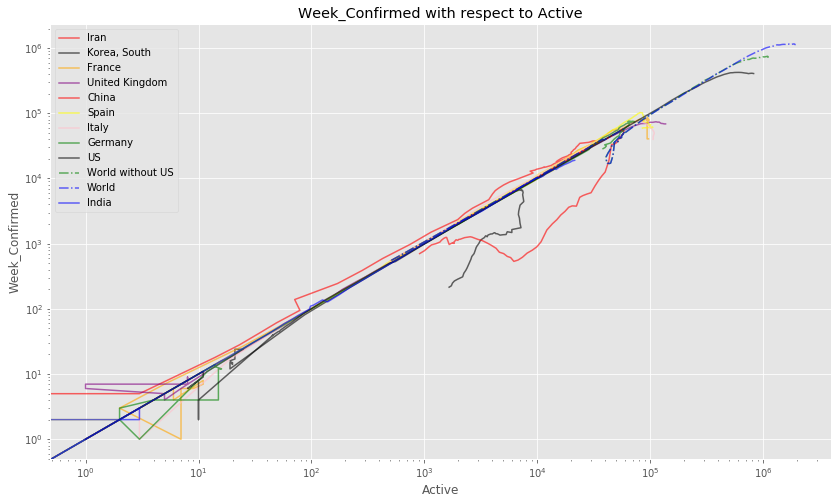

In [23]:
plotwithx('Active', ['Week_Confirmed'])

In [24]:
Removing_period = {}
for cun in DF_Dict:
    tr = int(Last_day_df[Last_day_df.index == cun].Removed)
    rp = len(DF_Dict[cun][DF_Dict[cun].Confirmed >= tr])
    Removing_period[cun] = rp
Removing_period

{'Australia': 23,
 'Austria': 20,
 'Bangladesh': 19,
 'Belarus': 18,
 'Belgium': 24,
 'Brazil': 10,
 'Canada': 18,
 'Chile': 15,
 'China': 17,
 'Colombia': 23,
 'Czechia': 28,
 'Denmark': 14,
 'Dominican Republic': 27,
 'Ecuador': 28,
 'France': 23,
 'Germany': 18,
 'India': 17,
 'Indonesia': 25,
 'Iran': 12,
 'Ireland': 15,
 'Israel': 25,
 'Italy': 30,
 'Japan': 26,
 'Korea, South': 34,
 'Malaysia': 20,
 'Mexico': 6,
 'Netherlands': 36,
 'Norway': 49,
 'Pakistan': 22,
 'Panama': 32,
 'Peru': 15,
 'Philippines': 29,
 'Poland': 25,
 'Portugal': 35,
 'Qatar': 24,
 'Romania': 23,
 'Russia': 20,
 'Saudi Arabia': 21,
 'Serbia': 27,
 'Singapore': 25,
 'Spain': 20,
 'Sweden': 31,
 'Switzerland': 19,
 'Turkey': 20,
 'US': 28,
 'Ukraine': 24,
 'United Arab Emirates': 21,
 'United Kingdom': 29,
 'World': 24,
 'World without US': 22}

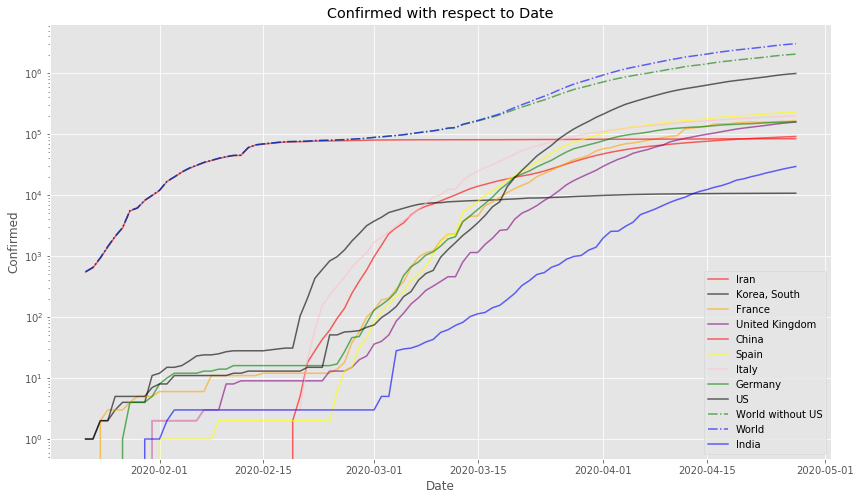

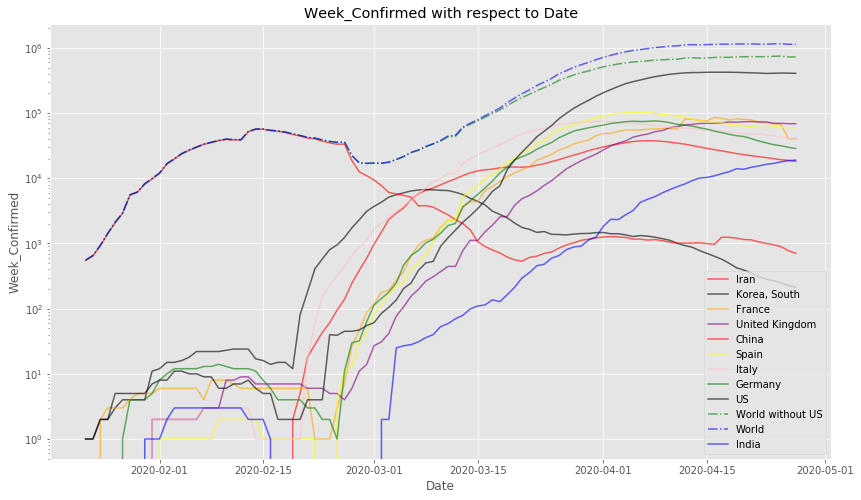

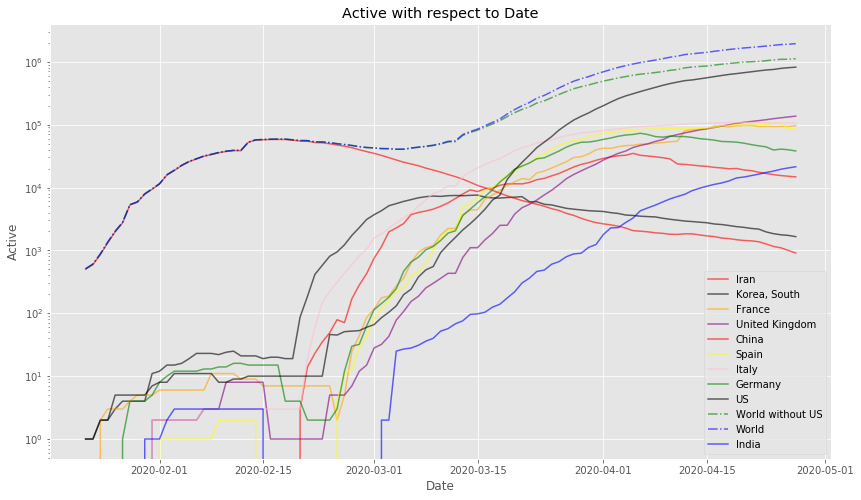

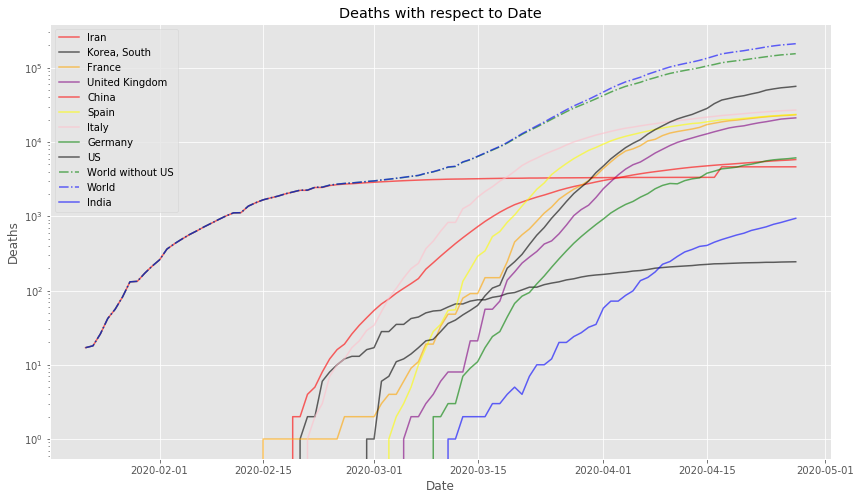

In [25]:
plotwithx('Date', ['Confirmed', 'Week_Confirmed', 'Active', 'Deaths'])

In [26]:
DF_Dict['France']

,Confirmed,Deaths,Recovered,Removed,Active,Mortality,Part_Active,Week_Confirmed,Week_Removed,Week_Recovered,Week_Deaths,Week_Mortality
Date,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-23,0,0,0,0,0,NaN,NaN,0,0,0,0,NaN
2020-01-24,2,0,0,0,2,NaN,1.000000,2,0,0,0,NaN
2020-01-25,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-26,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-27,3,0,0,0,3,NaN,1.000000,3,0,0,0,NaN
2020-01-28,4,0,0,0,4,NaN,1.000000,4,0,0,0,NaN
2020-01-29,5,0,0,0,5,NaN,1.000000,5,0,0,0,NaN
2020-01-30,5,0,0,0,5,NaN,1.000000,5,0,0,0,NaN
